

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
    
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. There are 14 columns in this dataset including the Patient's ID, gender, age, neighbourhood, and various health conditions, among other info. We are going to look at what may cause patients to miss their appointments. 


### Question(s) for Analysis
>I would like to know what the statistical correlation is between not showing up to one's appointment and the amount of days in advance the appointment was scheduled. I also would like to investigate the impact of disease and impairment on each gender's ability to show up. Does sickness or impairment have a stronger correlation with absenteeism among one particular gender?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Loading the data. 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Priting out the data and inspecting it. 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
# checking for duplicate rows
sum(df.duplicated())

0


### Data Cleaning
> This data must first be cleaned before it can be analyzed and visualized in a coherent manner. There are several problems that I discovered when inspecting. First, PatientID should be an integer. Second, both ScheduledDay and AppointmentDay columns must be datetimes and cleaned up so they just include the date, we do not need to have specific times for this analysis. Next, the columns "Hipertension" "Handcap" and "Neighbourhood" are spelled wrong. Lastly, the "Scholarship, "Hypertension", "Diabetes", "Alcoholism", "Handicap", and "SMS_received columns should not be integers, rather they should boolean values, as the dataset states.
 

In [5]:
# I am going to start by changing some of the colums names
df.rename(columns={"PatientId": "Patient_ID", "AppointmentID": "Appointment_ID", "ScheduledDay": "Scheduled_Day", "AppointmentDay": "Appointment_Day", "Neighbourhood": "Neighborhood", "Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True)


In [6]:
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# I am going to change the data type of Patient_ID from a float to an integer. 
df['Patient_ID'] = df['Patient_ID'].astype(int)

In [8]:
# Now I am going going to change the data types of the "Scheduled_Day" and "Appointment_Day" columns from strings to datetimes.
df[['Scheduled_Day', 'Appointment_Day']] = df[['Scheduled_Day', 'Appointment_Day']].apply(pd.to_datetime)
df['Scheduled_Day'] = df['Scheduled_Day'].dt.date
df['Appointment_Day'] = df['Appointment_Day'].dt.date 

In [9]:
# Now I am going to replace the int values in columns "Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap", and "SMS_received" to boolean values. I am doing this because website for the dataset mentions that these are true or false values.
df.iloc[:, 7:13] = df.iloc[:, 2:].astype(bool)

In [10]:
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [12]:
# I know my analysis is going to involve the amount of days ahead that an appointment was scheduled. So I need to create a new column in the dataset.
df['Days_Scheduled_Ahead'] = (df['Appointment_Day'] - df['Scheduled_Day']) / np.timedelta64(1, 'D')

In [13]:
#I want to see if there any any negative values that are nonsensical and must be removed.
df.loc[df['Days_Scheduled_Ahead'] < 0]

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Scheduled_Ahead
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,False,False,False,False,True,False,Yes,-1.0
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,True,False,Yes,-1.0
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,False,False,Yes,-1.0
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,False,False,Yes,-6.0
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,False,False,False,False,False,False,Yes,-1.0


In [14]:
#There appears to be 6 rows with Schedule_Day ahead of Appointment_Day. This data is nonsensical and must be removed.
df.drop(df.loc[df['Days_Scheduled_Ahead'] < 0].index, inplace=True)

In [15]:
df.loc[df['Days_Scheduled_Ahead'] < 0].shape

(0, 15)

In [38]:
df[(df['Days_Scheduled_Ahead'] > 15)]['Handicap'].count()

26246

In [40]:
df[(df['Days_Scheduled_Ahead'] < 15)]['Handicap'].count() - df[(df['Days_Scheduled_Ahead'] == 0)]['Handicap'].count()

44210

In [41]:
df[(df['Days_Scheduled_Ahead'] == 0)]['Handicap'].count()

38563

> Now I want to create another column in the dataset that will segment each appointment into one of three categories: scheduled same day, less than two weeks in advance, and more than two weeks in advance. I believe these segments will enhance my analysis of how the scheduling of an appointment impacts one's ability to show up. I choose two weeks because it creates creates three segments that are not too different in size and also because planning is often measured in weeks ahead of time. 

In [44]:
bins = [-1, .5, 15, 400]
df['Scheduled_Ahead_Segment'] = pd.cut(df['Days_Scheduled_Ahead'], bins = bins, labels = ['Same Day', '<= Two Weeks', '> Two Weeks'], include_lowest = True)

In [45]:
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Scheduled_Ahead,Scheduled_Ahead_Segment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0.0,Same Day
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No,0.0,Same Day
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No,0.0,Same Day
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,0.0,Same Day
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No,0.0,Same Day


<a id='eda'></a>
## Exploratory Data Analysis


> Now that I have cleaned up the data and added columns relevant to my analysis, it is time to compute and portray statistics that will help answer my exploratory questions.


### Research Question 1: Is scheduling an appointment ahead of time correlated with one's ability to show up?
> To answer this I must I am going to calculate the "No-show" percentage for each segment I previously created. 

In [46]:

df_segment_noshowpercentage = df[(df['No-show'] == 'Yes')].groupby(['Scheduled_Ahead_Segment', 'No-show'])['No-show'].count() / df.groupby(['Scheduled_Ahead_Segment'])['No-show'].count()
df_segment_noshowpercentage*100
df_segment_noshowpercentage.index = ['Day of', '< Two Weeks', '> Two Weeks']

In [47]:
df_segment_noshowpercentage

Day of         0.046469
< Two Weeks    0.261151
> Two Weeks    0.327059
Name: No-show, dtype: float64

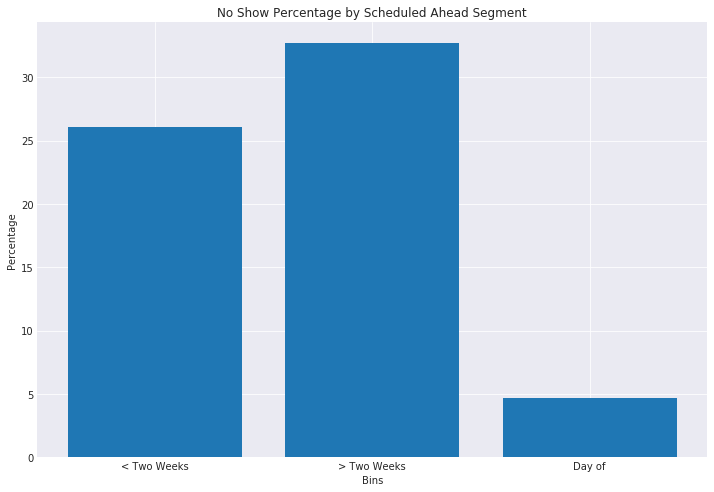

In [48]:
plt.subplots(figsize=(12, 8))
plt.bar(df_segment_noshowpercentage.index, df_segment_noshowpercentage*100)
plt.title('No Show Percentage by Scheduled Ahead Segment')
plt.xlabel('Bins')
plt.ylabel('Percentage');

> It is clear that people who scheduled their appointments furthest in advanced showed up much less frequently than people who booked day of or a few days before. Folks who scheduled their appointment the day of rarely failed to show up to the appointment.


### Research Question 2  (Do people with certain health coniditions (diabetes, hypertension, alcoholism, handicapped) show up more often than those without health conditions and can a difference be seen between Men and Women?

In [49]:
# First I am going to create 4 additional dataframes. These Datatframes will split the data between Men and Women who showed up and absentees.
df_nsM = df[(df['No-show'] == 'Yes') & (df['Gender'] == 'M')]
df_sM = df[(df['No-show'] == 'No') & (df['Gender'] == 'M')]
df_nsF = df[(df['No-show'] == 'Yes') & (df['Gender'] == 'F')]
df_sF = df[(df['No-show'] == 'No') & (df['Gender'] == 'F')]


In [50]:
# Now for both Men and Women I want to calculate how many have health conditions and don't. 
noshow_sickM = df_nsM.loc[(df_nsM['Alcoholism'] == True) | (df_nsM['Diabetes'] == True) | (df_nsM['Handicap'] == True) | (df_nsM['Hypertension'] ==True)]['Patient_ID'].count()
noshow_sickF = df_nsF.loc[(df_nsF['Alcoholism'] == True) | (df_nsF['Diabetes'] == True) | (df_nsF['Handicap'] == True) | (df_nsF['Hypertension'] ==True)]['Patient_ID'].count()
noshow_notsickM = df_nsM['Patient_ID'].count() - noshow_sickM
noshow_notsickF = df_nsF['Patient_ID'].count() - noshow_sickF

> To analyse this I am first going to create two pie charts to see what percent of "no-shows" have health conditions for both men and women. I am then going to compare to to what percent of people who showed up have health conditions for both men and women. Having these four pie charts will allow me to see if people who have health conditions tended to show up more frequently and if there's a difference in this regard between men and women. 

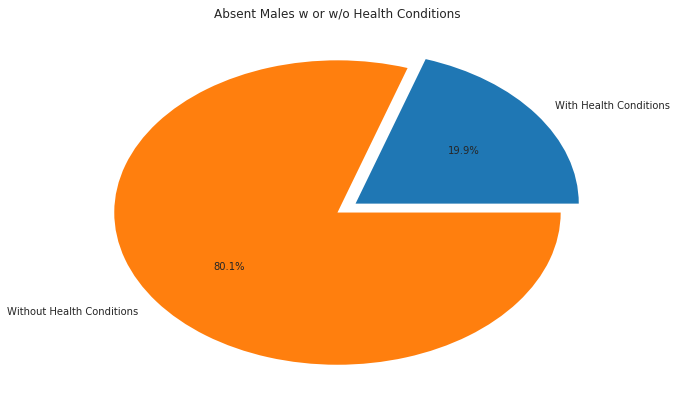

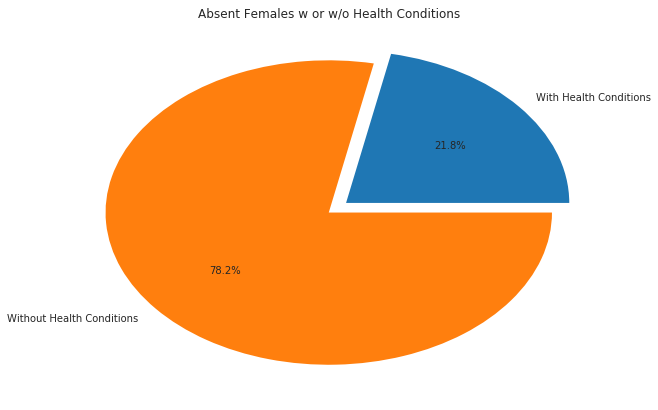

In [55]:
# Now I am going to create pie charts to see what percent of no shows have health condditions for Males and Females.
labelsNSM = ['With Health Conditions', 'Without Health Conditions']
 
dataNSM = [noshow_sickM, noshow_notsickM]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(dataNSM, labels = labelsNSM, explode = (0.1, 0), autopct='%1.1f%%')
 
# show plot
plt.title('Absent Males w or w/o Health Conditions')
plt.show()

labelsNSF = ['With Health Conditions', 'Without Health Conditions']
 
dataNSF = [noshow_sickF, noshow_notsickF]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(dataNSF, labels = labelsNSF, explode = (0.1, 0), autopct='%1.1f%%')
 
# show plot
plt.title('Absent Females w or w/o Health Conditions')
plt.show()

In [52]:
show_sickM = df_sM.loc[(df_sM['Alcoholism'] == True) | (df_sM['Diabetes'] == True) | (df_sM['Handicap'] == True) | (df_sM['Hypertension'] ==True)]['Patient_ID'].count()
show_sickF = df_sF.loc[(df_sF['Alcoholism'] == True) | (df_sF['Diabetes'] == True) | (df_sF['Handicap'] == True) | (df_sF['Hypertension'] ==True)]['Patient_ID'].count()
show_notsickM = df_sM['Patient_ID'].count() - show_sickM
show_notsickF = df_sF['Patient_ID'].count() - show_sickF

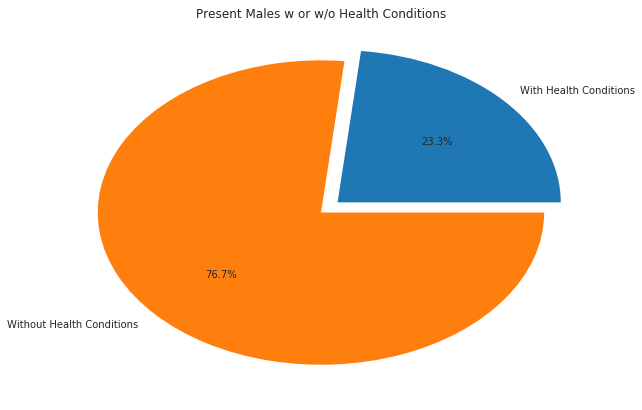

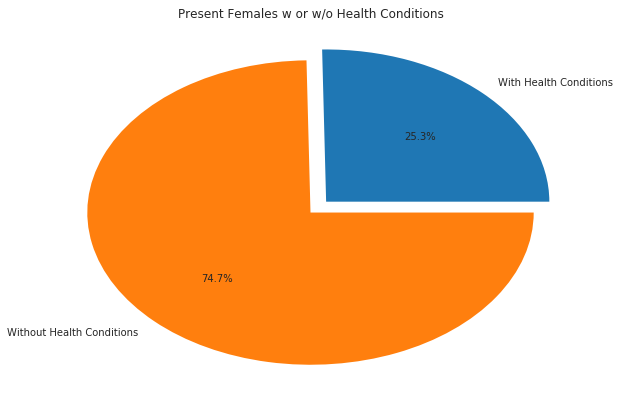

In [56]:
# Now I am going to create pie charts to see what percent of present people have health condditions for Males and Females.
labelsSM = ['With Health Conditions', 'Without Health Conditions']
 
dataSM = [show_sickM, show_notsickM]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(dataSM, labels = labelsSM, explode = (0.1, 0), autopct='%1.1f%%')
 
# show plot
plt.title('Present Males w or w/o Health Conditions')
plt.show()

labelsSF = ['With Health Conditions', 'Without Health Conditions']
 
dataSF = [show_sickF, show_notsickF]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(dataSF, labels = labelsSF, explode = (0.1, 0), autopct='%1.1f%%')
 
# show plot
plt.title('Present Females w or w/o Health Conditions')
plt.show()

> From these four pie charts we can see that among people who showed up to their appointments a larger portion of these people have at least one health condition compared to folks who did not show up. There does not appear to be a significant difference between Men and Women in this regard.

<a id='conclusions'></a>
## Conclusions

> From the data analysis conducted above we can first see that in general people who schedule their appointments further out in advance tend to not show up on a more frequent basis. For example, the percentage of people who booked their appointments the day of and did not attend is under 5%, whereas it is above 30% for those who scheduled over two weeks in advance. This is a tremendous difference!

>>One of the limitations of this analysis is that the sample size for each segment is not the same size. There are more people who booked their appointments on the same day than people who scheduled more than two weeks in advance. I also must mention that many factors can impact one's ability to show up to an appointment, so we cannot even know for certain that scheduling ahead of time has a impact. What we do know is that people who scheduled the day of missed their appoitment with much lower frequency than those who booked appointments over two weeks in advance. 

> Next I analyzed the "No-show" percetage from a different point of view. I wanted to know if people with health conditions, namely hypertension, diabetes, alcoholism, and handicappedness, were more or less likely to miss an appointment than those without. I looked at this from the perspective of each gender as well. It seems that people with at least one of these health conditions miss their appointments less frequently than people without health conditions, although there did not appear to be any significant difference between genders in this regard. 

>>I think it is important to point out a limitation that the people without these health conditions could still have other health conditions that were not listed in the dataset. 





In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0